In [1]:
#importing libareies 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')


#A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

In [2]:
#loading data set
file_path = pd.read_csv(r'C:\Users\sheet\Downloads\Housing.csv')
Housing = file_path 
Housing

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1                no             yes        3       no        furnished  
2                no              no        2      yes   semi-furnished  
3                no             yes        3      yes        furnished  
4                no             yes        2       no        furnished  
..              ...             ...      ...      ...              ...  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  

[545 rows x 13 columns]

In [3]:
#dispaly first 10 row of data sets
Housing.head(10)

price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
5              no             yes        2      yes   semi-furnished  
6              no             yes        2      yes   semi-furnished  
7              no              no        0       no      unfurnished  
8              no             yes        2      yes        furnished  
9              no             yes        1      yes      unfurnished

In [4]:
#getting information about data st
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
#shape of the data set
Housing.shape

(545, 13)

In [6]:
#decirbe data set as an null values,size of data and data type
Housing.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [7]:
##Here we can see the columns having Null values more than 0.
Housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
## checking null values using heat map
plt.rcParams['figure.figsize']=(30,30)
plt.rcParams['figure.dpi']=250

<Axes: >

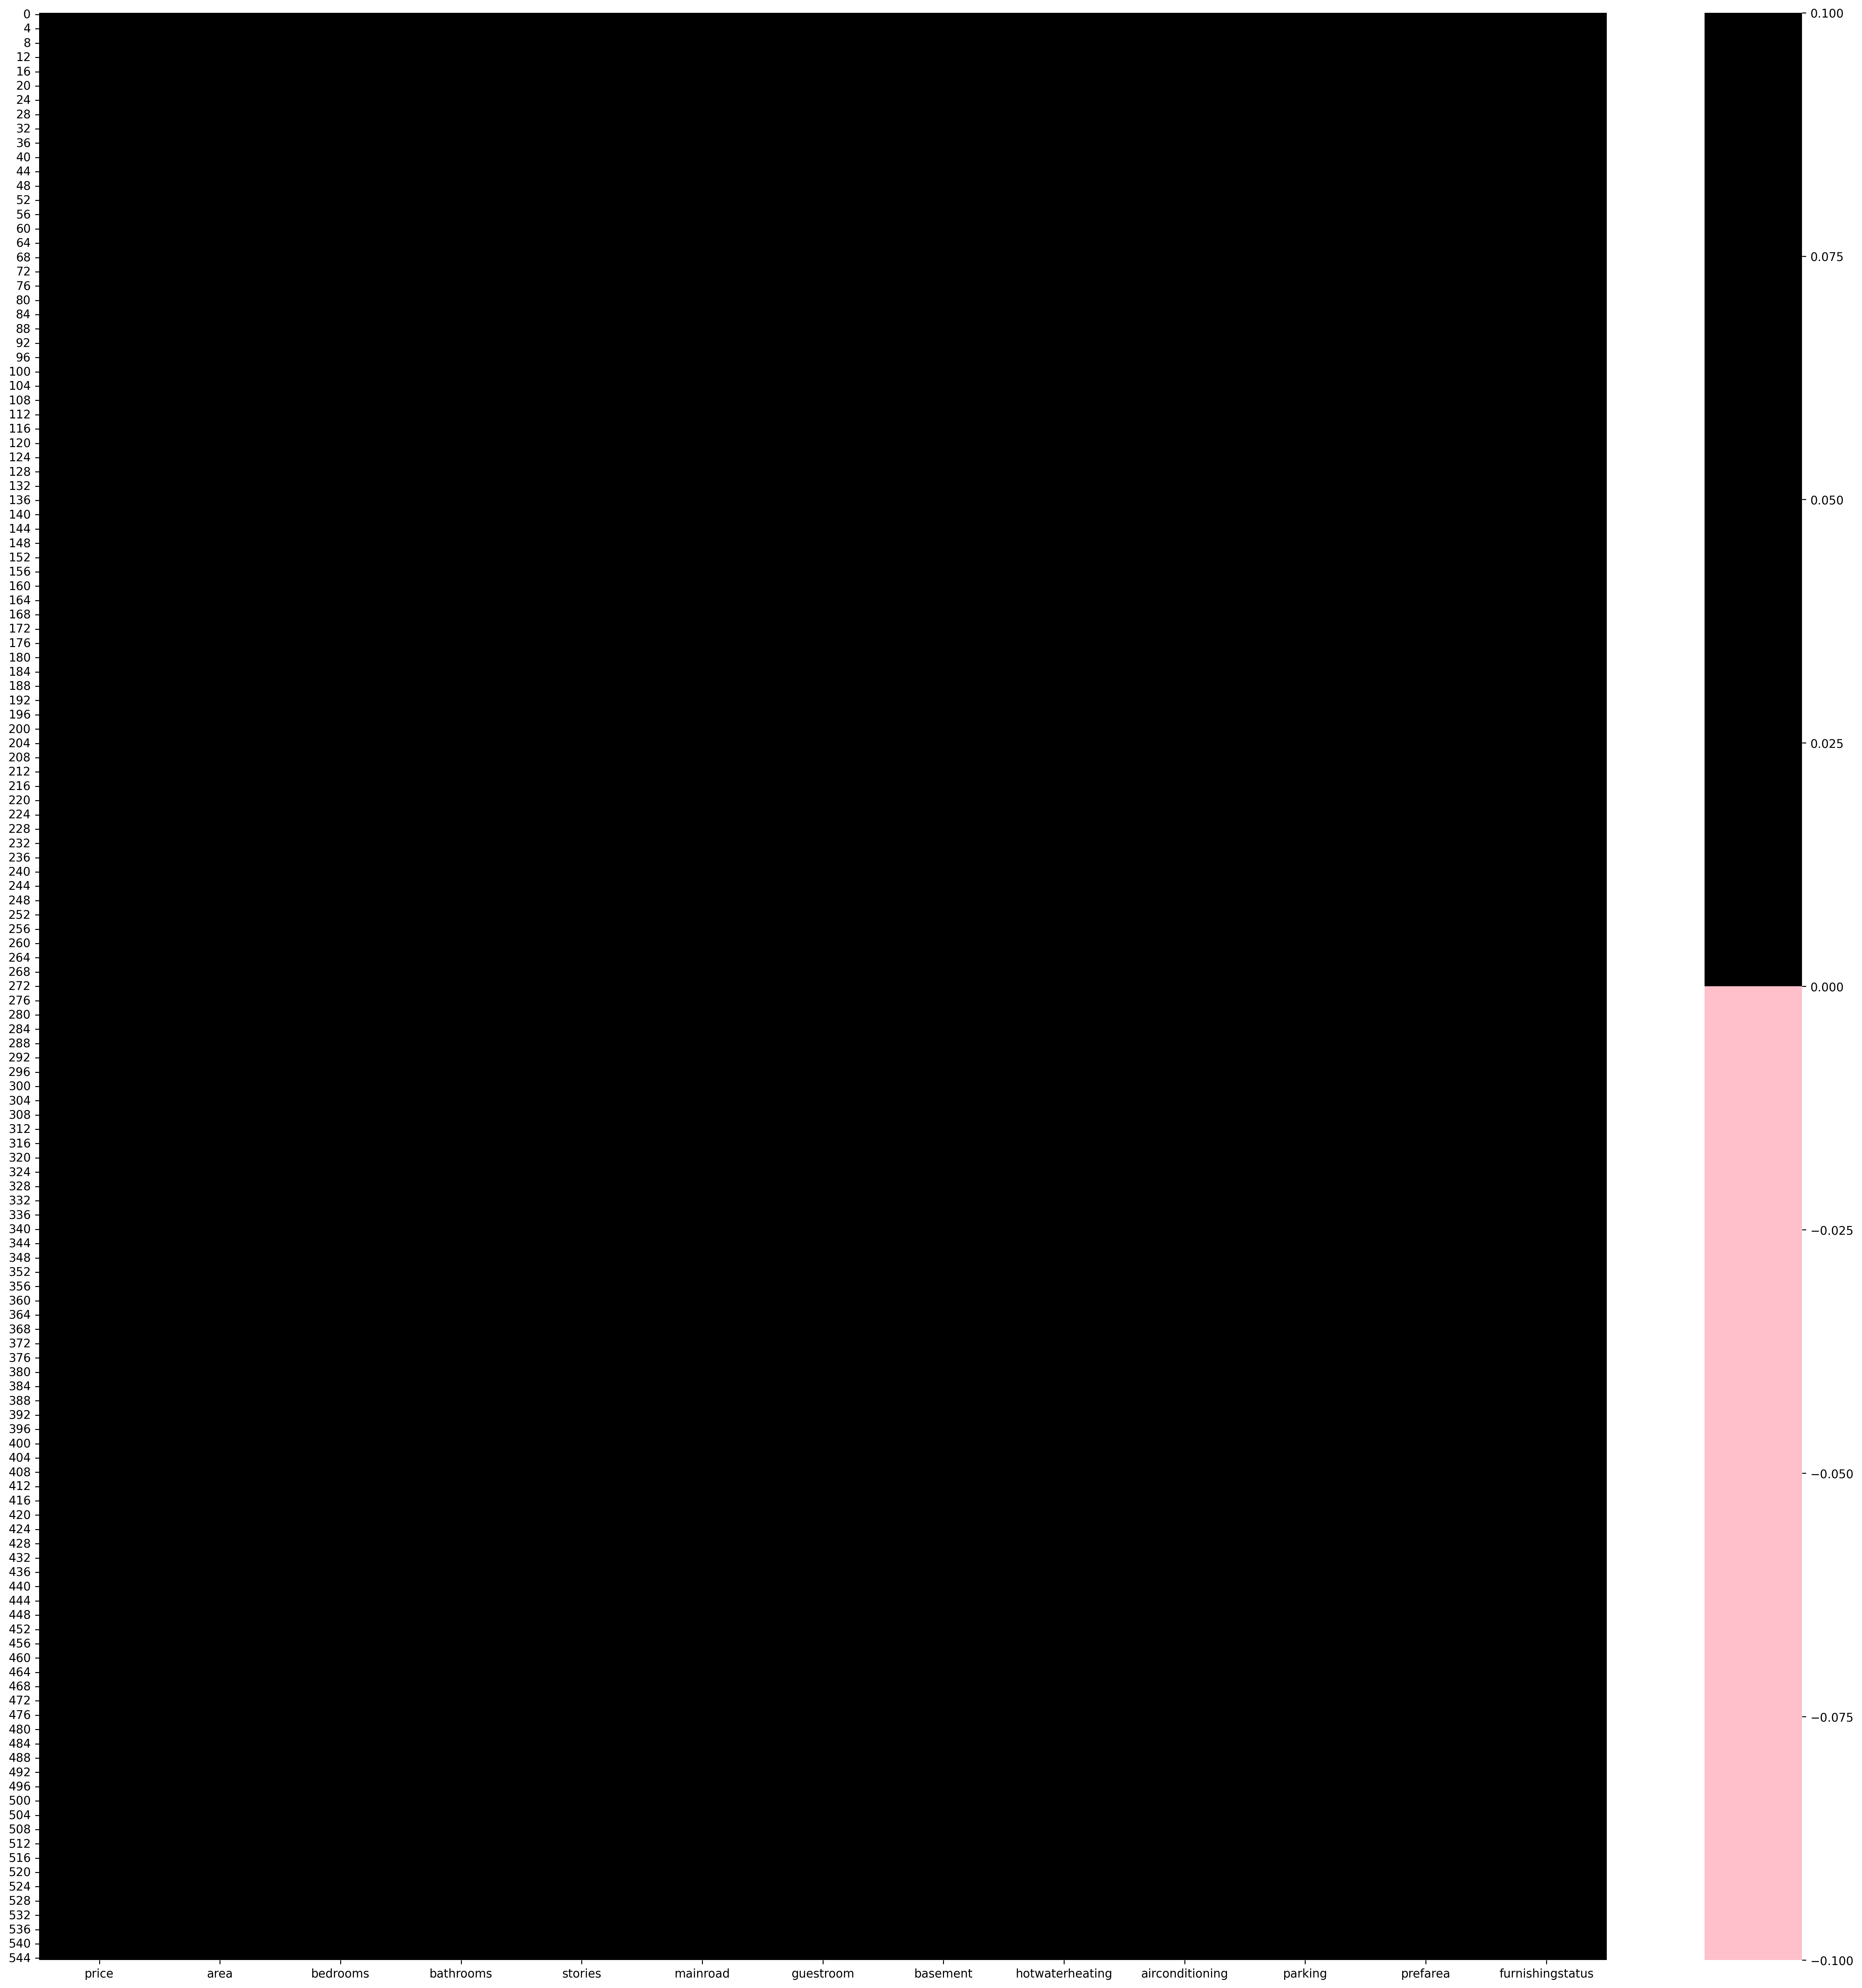

In [9]:
sns.heatmap(Housing.isnull(),cmap=['pink','black'])

In [10]:
# to check any dupliactes
Housing[Housing.duplicated()]

Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []

In [11]:
# inspecting unique values in data set
Housing.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [12]:
# Check unique values of categorical variables
for i in Housing.columns:
    print("Number of unique values in ",i,"is", Housing[i].nunique())

Number of unique values in  price is 219
Number of unique values in  area is 284
Number of unique values in  bedrooms is 6
Number of unique values in  bathrooms is 4
Number of unique values in  stories is 4
Number of unique values in  mainroad is 2
Number of unique values in  guestroom is 2
Number of unique values in  basement is 2
Number of unique values in  hotwaterheating is 2
Number of unique values in  airconditioning is 2
Number of unique values in  parking is 4
Number of unique values in  prefarea is 2
Number of unique values in  furnishingstatus is 3


In [13]:
# Check unique values of categorical variables
print("\nUnique values of 'mainroad':")
print(Housing['mainroad'].unique())
print("\nUnique values of 'guestroom':")
print(Housing['guestroom'].unique())
print("\nUnique values of 'basement':")
print(Housing['basement'].unique())
print("\nUnique values of 'hotwaterheating':")
print(Housing['hotwaterheating'].unique())
print("\nUnique values of 'airconditioning':")
print(Housing['airconditioning'].unique())
print("\nUnique values of 'prefarea':")
print(Housing['prefarea'].unique())
print("\nUnique values of 'furnishingstatus':")
print(Housing['furnishingstatus'].unique())


Unique values of 'mainroad':
['yes' 'no']

Unique values of 'guestroom':
['no' 'yes']

Unique values of 'basement':
['no' 'yes']

Unique values of 'hotwaterheating':
['no' 'yes']

Unique values of 'airconditioning':
['yes' 'no']

Unique values of 'prefarea':
['yes' 'no']

Unique values of 'furnishingstatus':
['furnished' 'semi-furnished' 'unfurnished']


In [14]:
## here we have some categirical varaibles to we have to convert them into numerical using label encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
Housing['mainroad'] = le.fit_transform(Housing['mainroad'])
Housing.head()

price  area  bedrooms  bathrooms  stories  mainroad guestroom basement  \
0  13300000  7420         4          2        3         1        no       no   
1  12250000  8960         4          4        4         1        no       no   
2  12250000  9960         3          2        2         1        no      yes   
3  12215000  7500         4          2        2         1        no      yes   
4  11410000  7420         4          1        2         1       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [18]:
Housing['guestroom'] = le.fit_transform(Housing['guestroom'])
Housing.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom basement  \
0  13300000  7420         4          2        3         1          0       no   
1  12250000  8960         4          4        4         1          0       no   
2  12250000  9960         3          2        2         1          0      yes   
3  12215000  7500         4          2        2         1          0      yes   
4  11410000  7420         4          1        2         1          1      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [19]:
Housing['basement'] = le.fit_transform(Housing['basement'])
Housing.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement hotwaterheating airconditioning  parking prefarea furnishingstatus  
0         0              no             yes        2      yes        furnished  
1         0              no             yes        3       no        furnished  
2         1              no              no        2      yes   semi-furnished  
3         1              no             yes        3      yes        furnished  
4         1              no             yes        2       no        furnished

In [20]:
Housing['hotwaterheating'] = le.fit_transform(Housing['hotwaterheating'])
Housing.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating airconditioning  parking prefarea  \
0         0                0             yes        2      yes   
1         0                0             yes        3       no   
2         1                0              no        2      yes   
3         1                0             yes        3      yes   
4         1                0             yes        2       no   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished

In [21]:
Housing['airconditioning'] = le.fit_transform(Housing['airconditioning'])
Housing.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking prefarea  \
0         0                0                1        2      yes   
1         0                0                1        3       no   
2         1                0                0        2      yes   
3         1                0                1        3      yes   
4         1                0                1        2       no   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished

In [22]:
Housing['prefarea'] = le.fit_transform(Housing['prefarea'])
Housing.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

  furnishingstatus  
0        furnished  
1        furnished  
2   semi-furnished  
3        furnished  
4        furnished

In [23]:
Housing['furnishingstatus'] = le.fit_transform(Housing['furnishingstatus'])
Housing.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0

In [24]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int32
 6   guestroom         545 non-null    int32
 7   basement          545 non-null    int32
 8   hotwaterheating   545 non-null    int32
 9   airconditioning   545 non-null    int32
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int32
 12  furnishingstatus  545 non-null    int32
dtypes: int32(7), int64(6)
memory usage: 40.6 KB


In [25]:
# outliers detection
Housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

<Axes: >

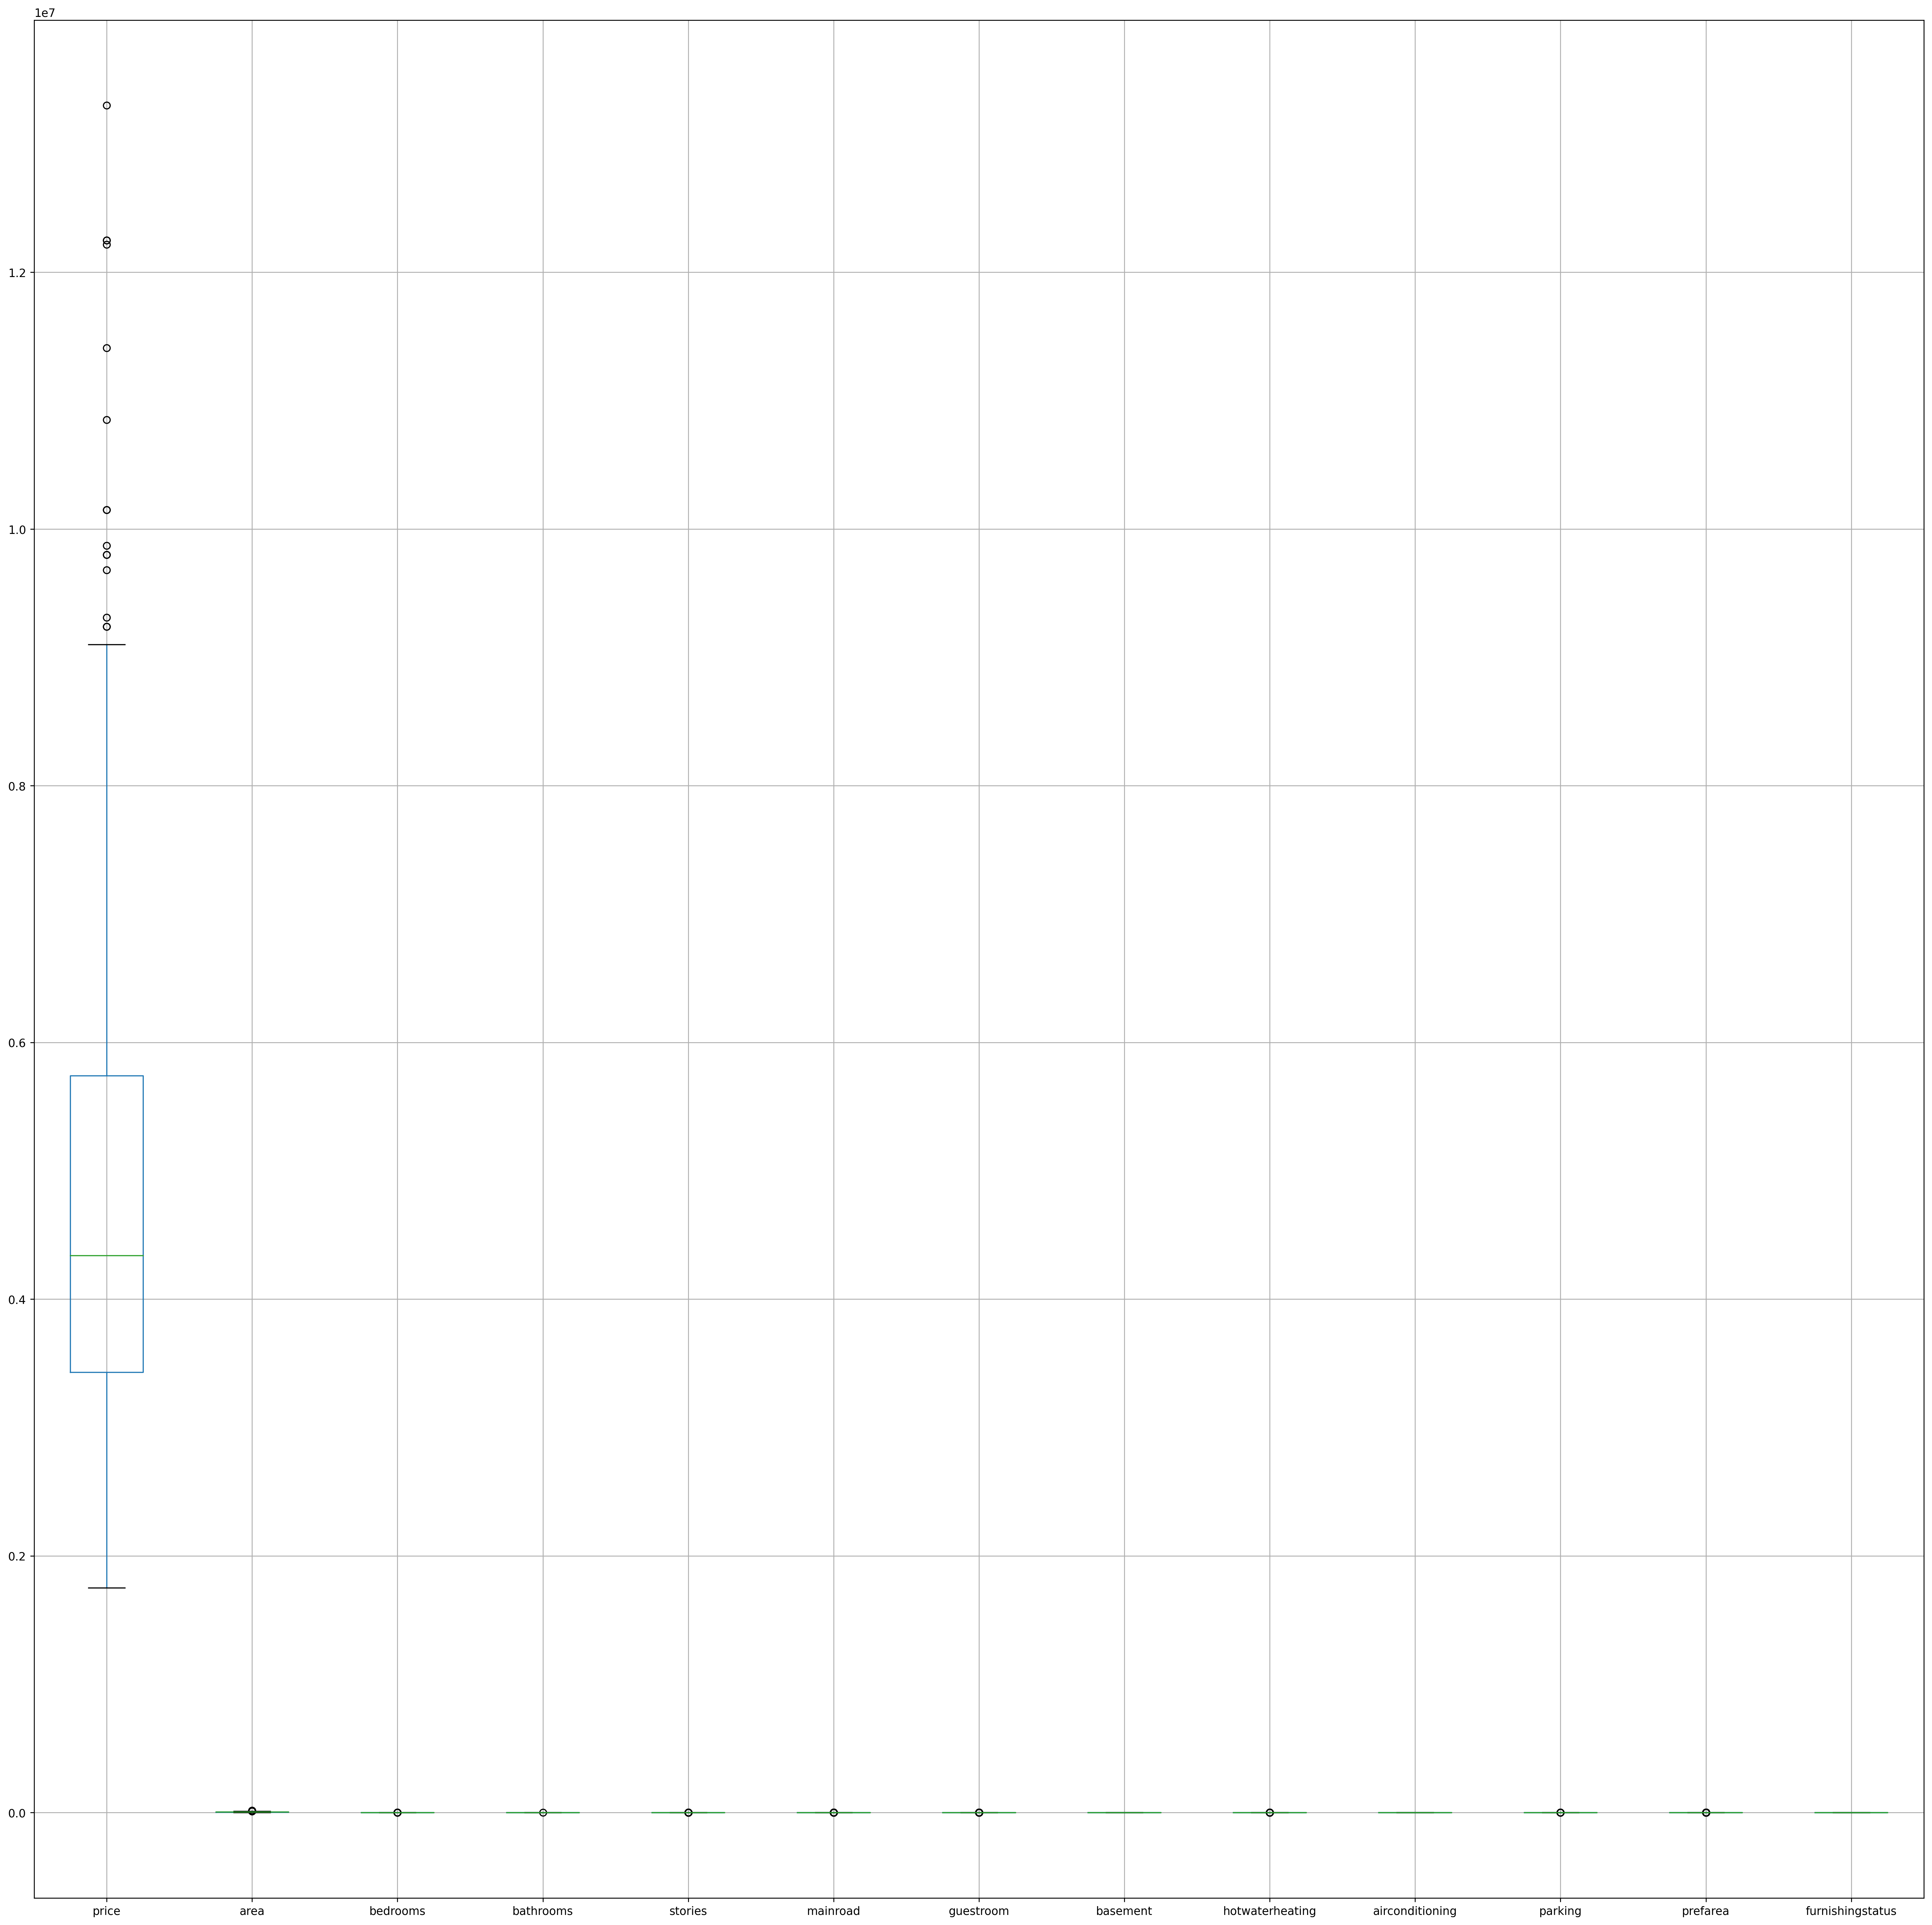

In [26]:
Housing.boxplot()

<Axes: >

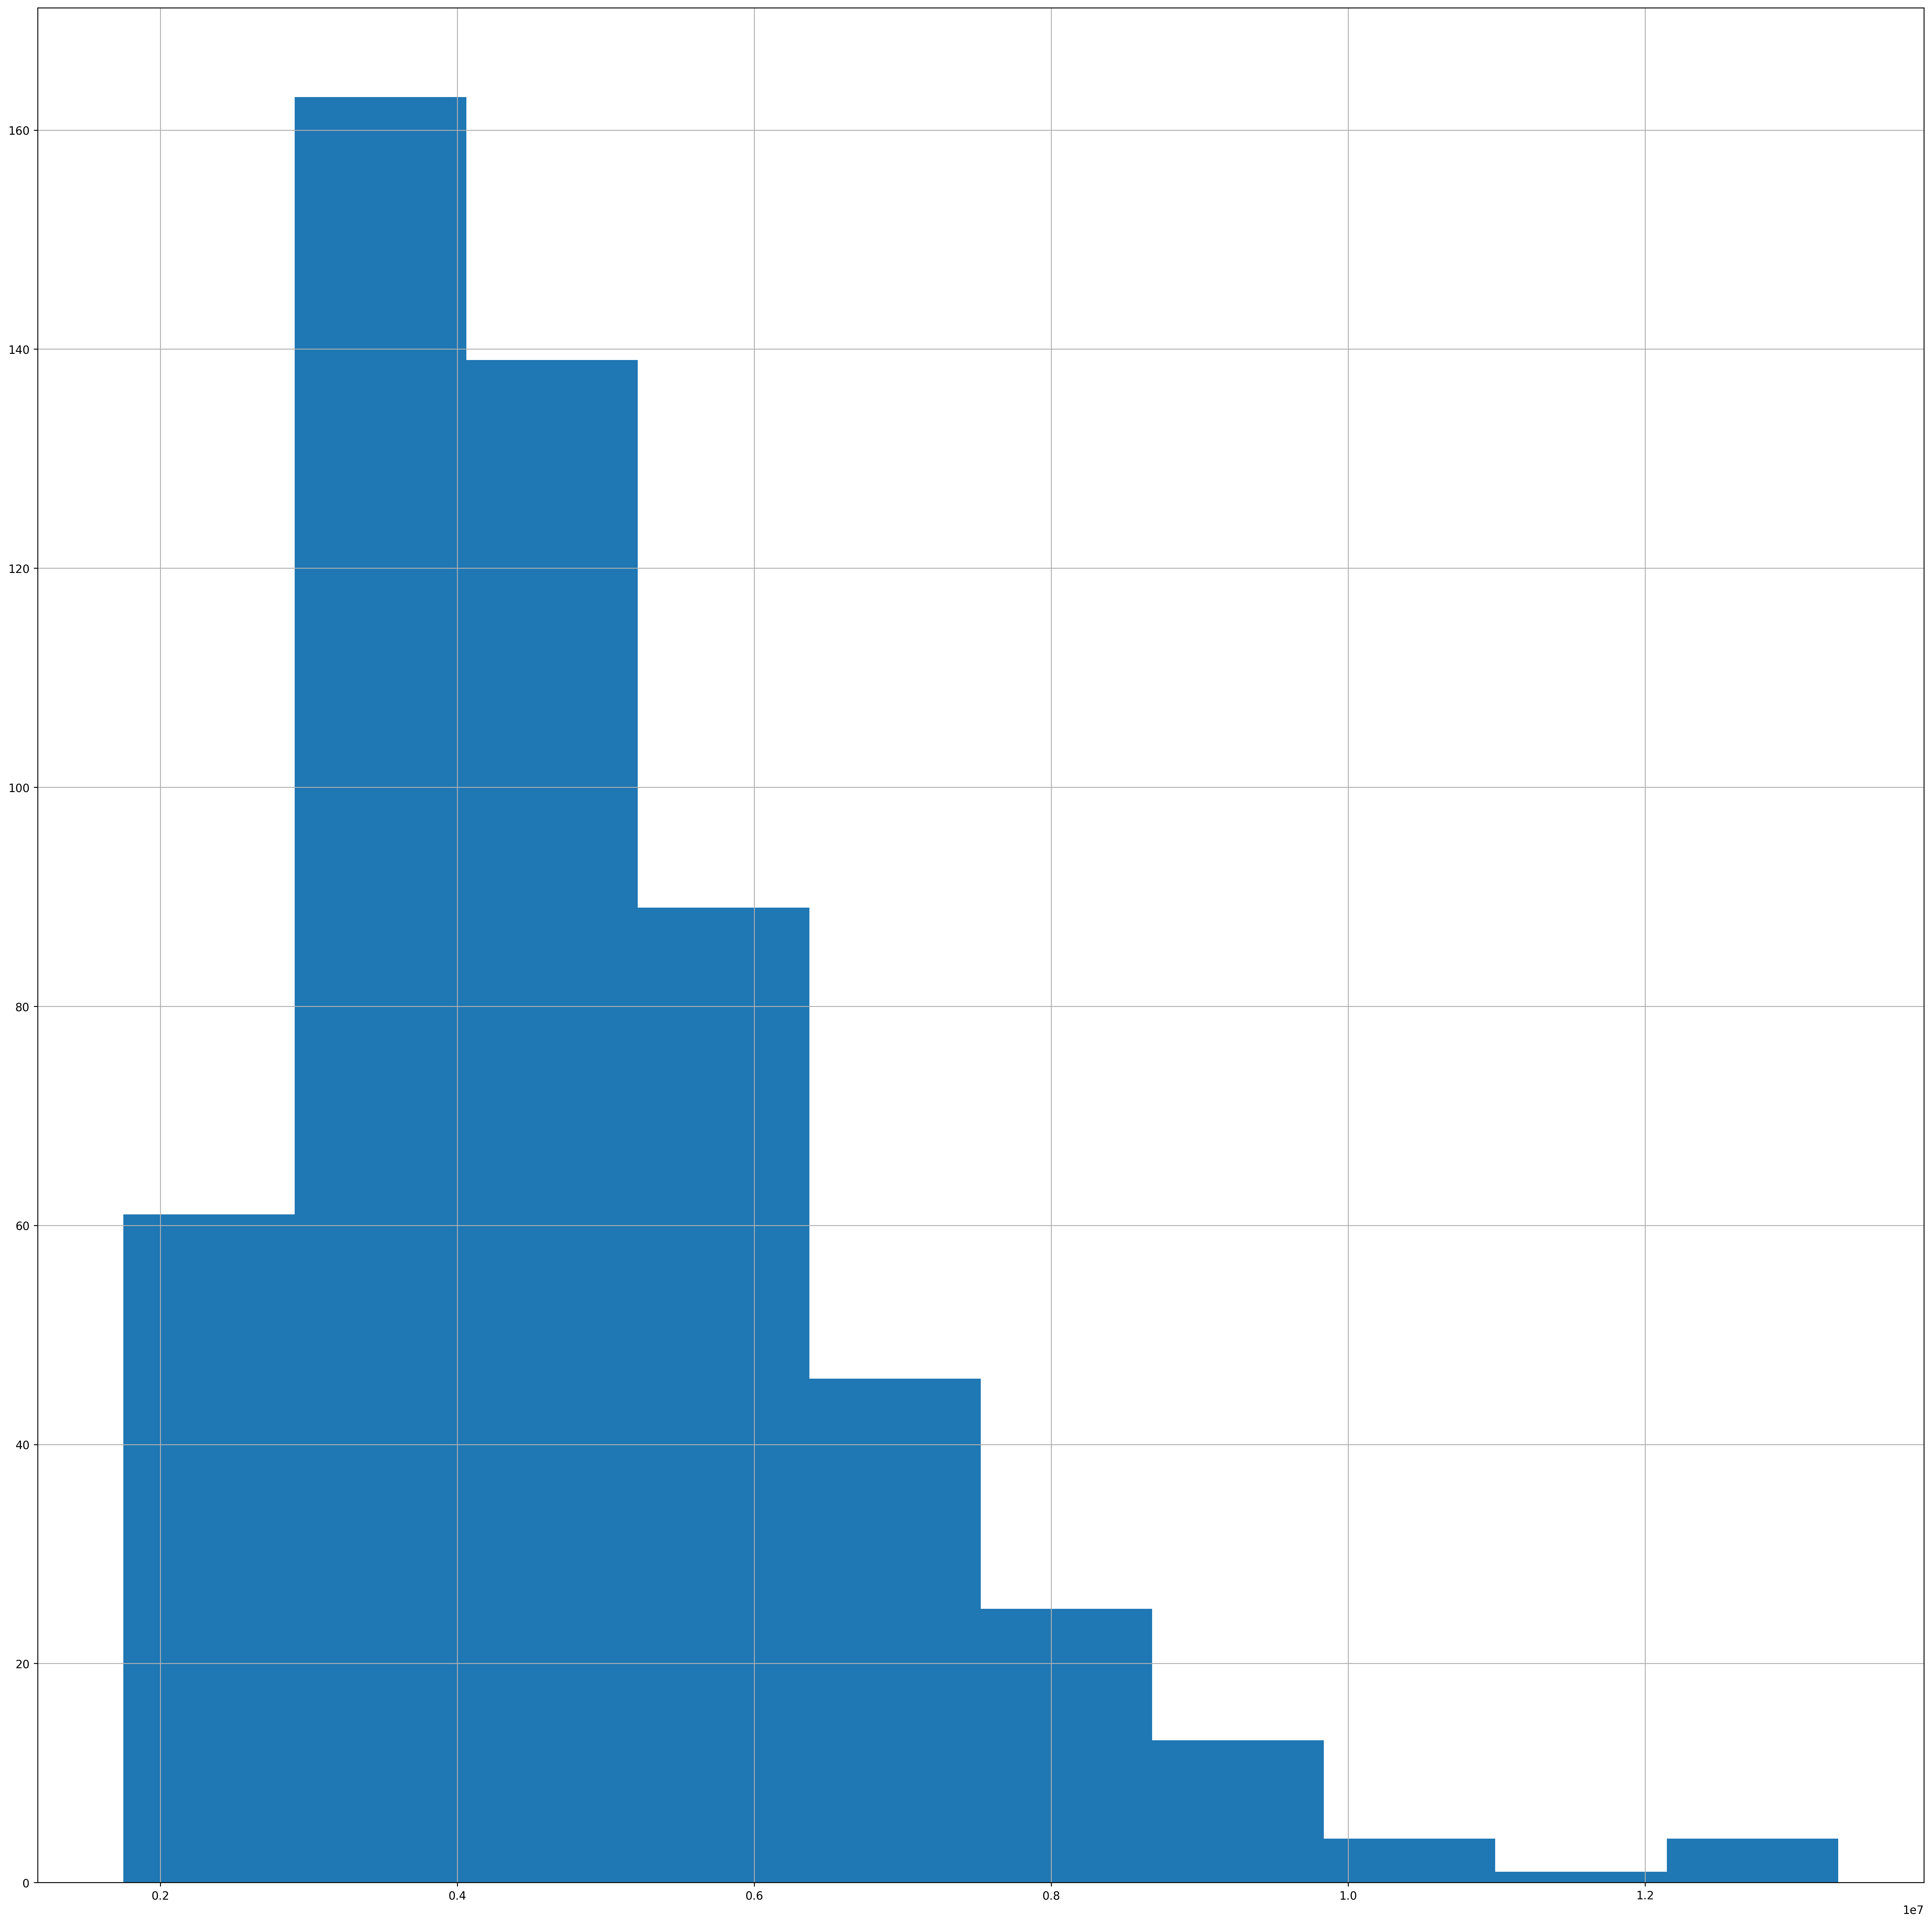

In [27]:
# histogram of prize
Housing['price'].hist()

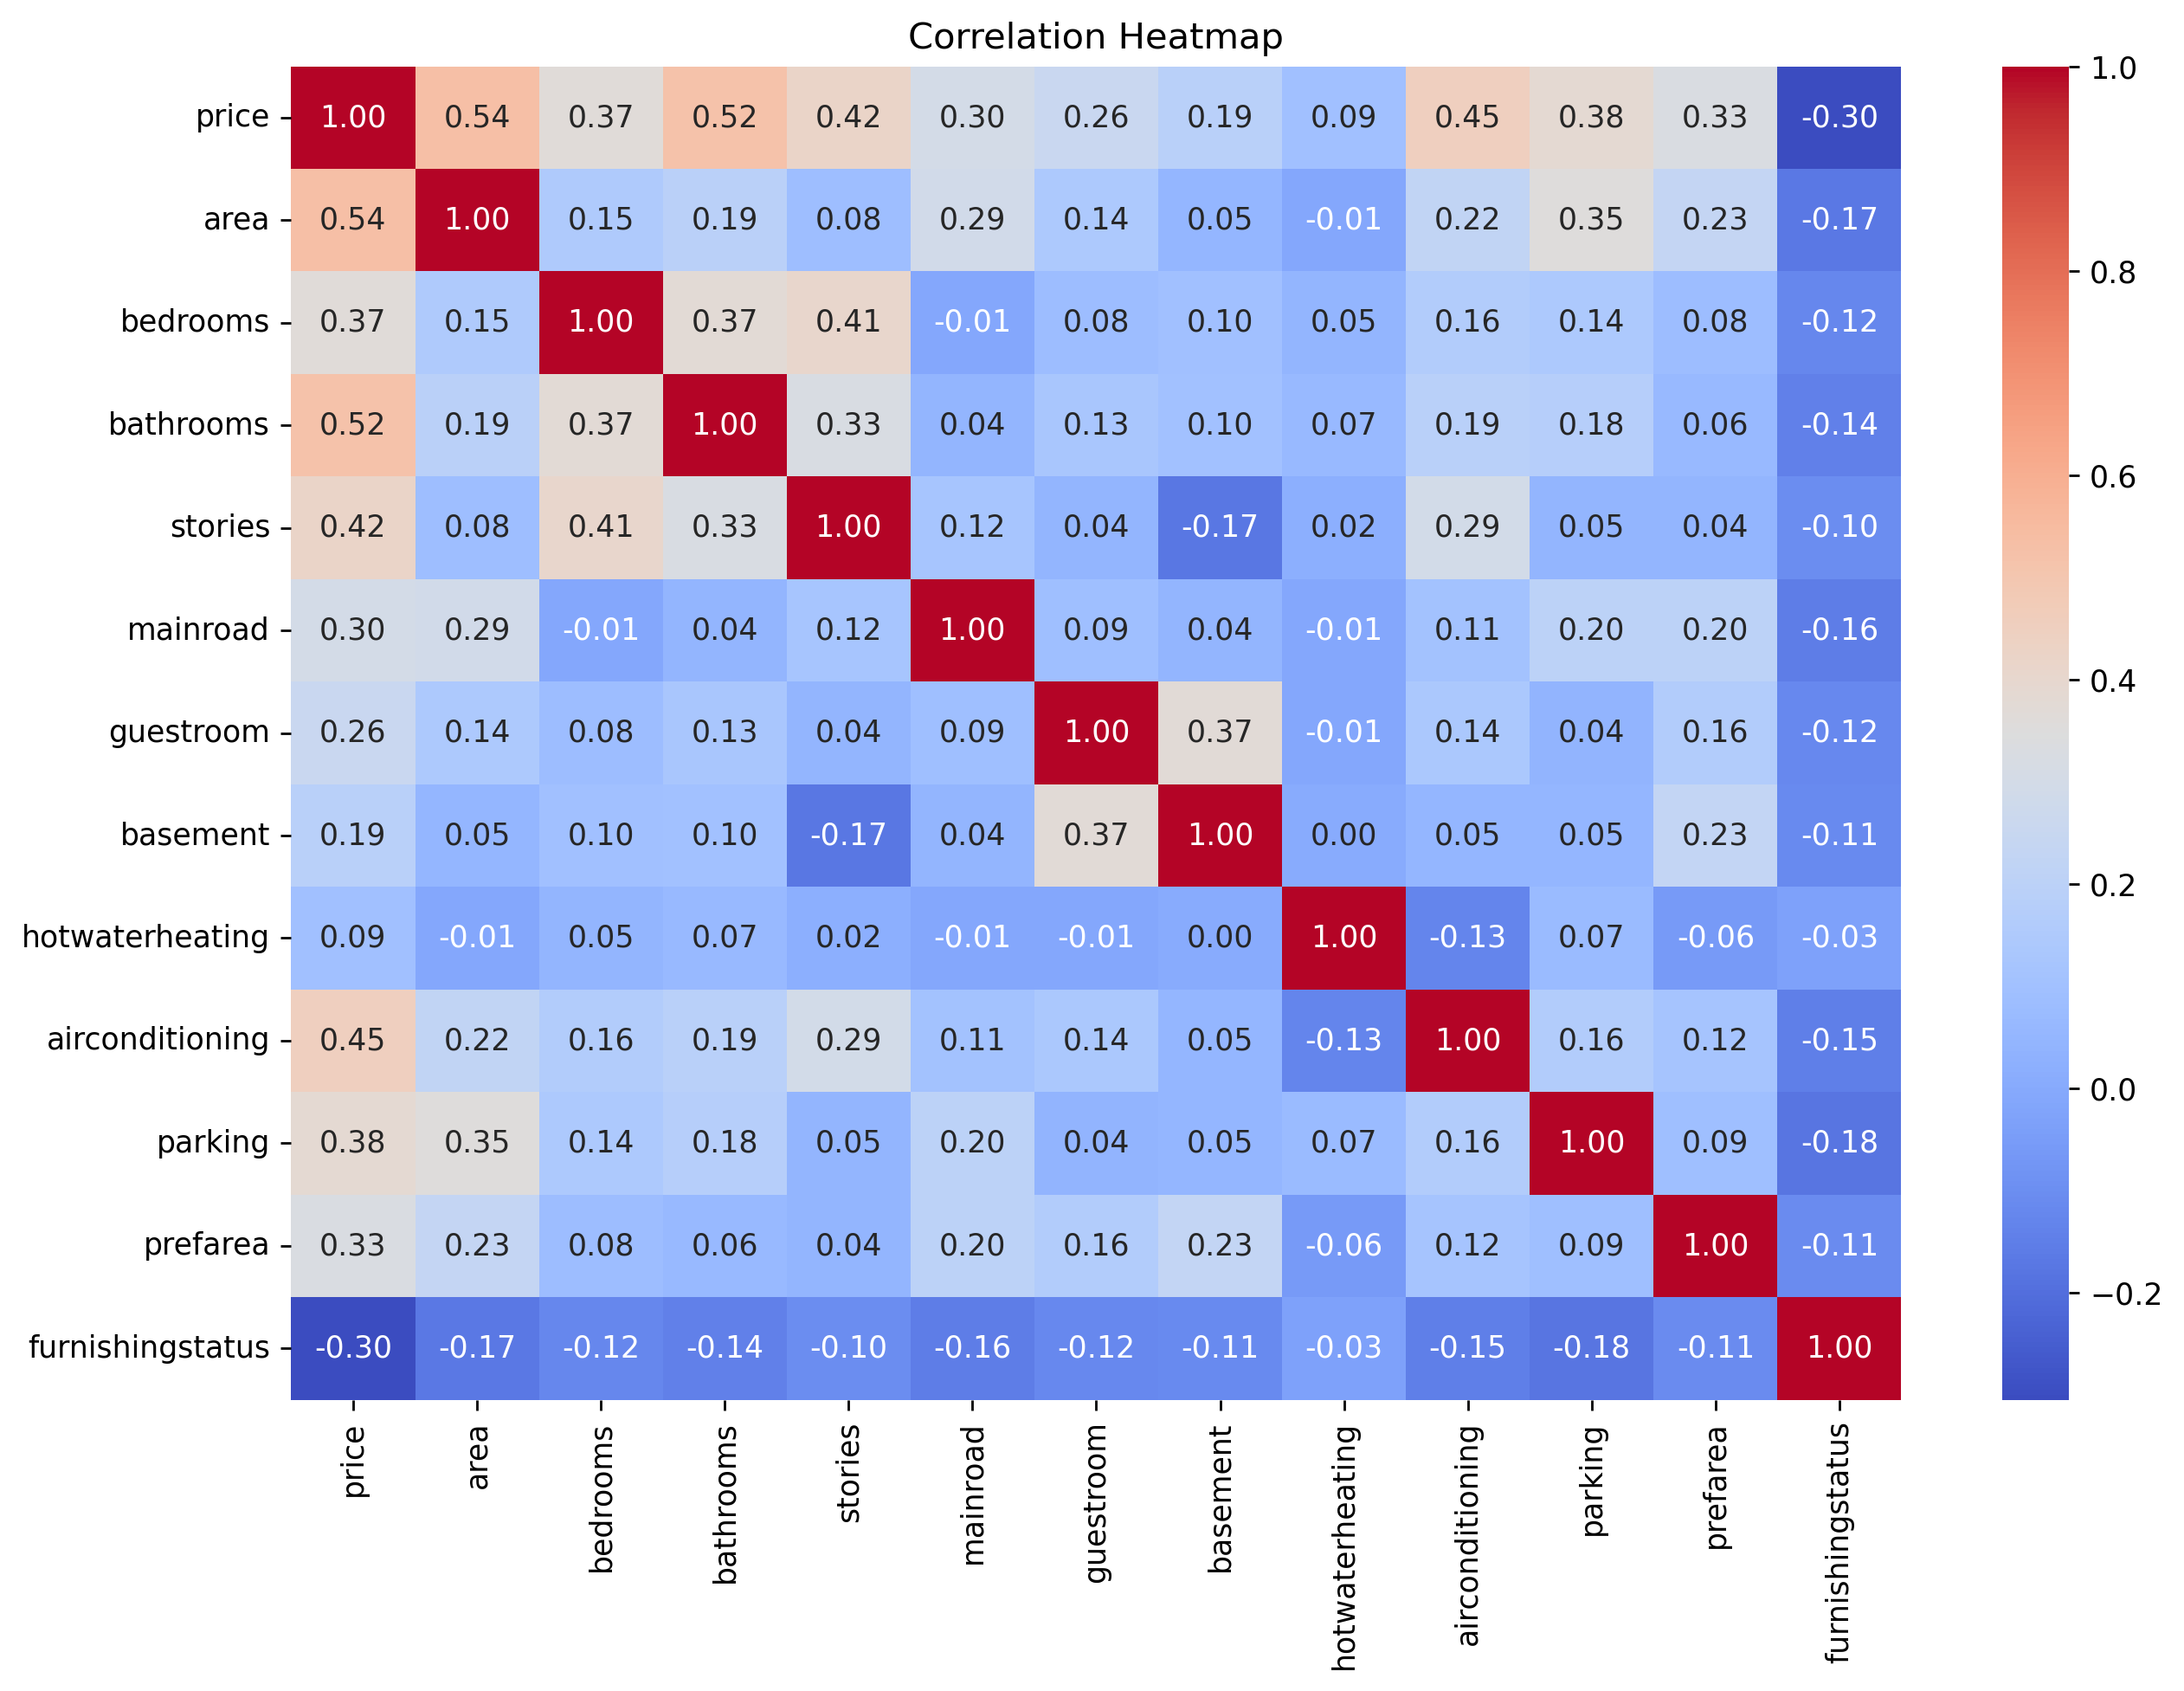

In [28]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(Housing.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [29]:
Housing.corr()

price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  0.234779  0.079023   0.063472  0.044425  0.199876   
furnishingstatus -0.304721 -0.171445 -0.123244  -0.143559 -0.104672 -0.156726   

                  guestroom  basement  hotwaterheating  airconditioning  \
price              0.255517  0.187057         0.093073         0.452954   
area               0.140297  0.047417        -0.009229         0.222393   
bedrooms           0.080549  0.097312         0.046049         0.160603   
bathrooms          0.126469  0.102106         0.067159         0.186915   
stories            0.043538 -0.172394         0.018847         0.293602   
mainroad           0.092337  0.044002        -0.011781         0.105423   
guestroom          1.000000  0.372066        -0.010308         0.138179   
basement           0.372066  1.000000         0.004385         0.047341   
hotwaterheating   -0.010308  0.004385         1.000000        -0.130023   
airconditioning    0.138179  0.047341        -0.130023         1.000000   
parking            0.037466  0.051497         0.067864         0.159173   
prefarea           0.160897  0.228083        -0.059411         0.117382   
furnishingstatus  -0.118328 -0.112831        -0.031628        -0.150477   

                   parking  prefarea  furnishingstatus  
price             0.384394  0.329777         -0.304721  
area              0.352980  0.234779         -0.171445  
bedrooms          0.139270  0.079023         -0.123244  
bathrooms         0.177496  0.063472         -0.143559  
stories           0.045547  0.044425         -0.104672  
mainroad          0.204433  0.199876         -0.156726  
guestroom         0.037466  0.160897         -0.118328  
basement          0.051497  0.228083         -0.112831  
hotwaterheating   0.067864 -0.059411         -0.031628  
airconditioning   0.159173  0.117382         -0.150477  
parking           1.000000  0.091627         -0.177539  
prefarea          0.091627  1.000000         -0.107686  
furnishingstatus -0.177539 -0.107686          1.000000

<Axes: xlabel='price', ylabel='Density'>

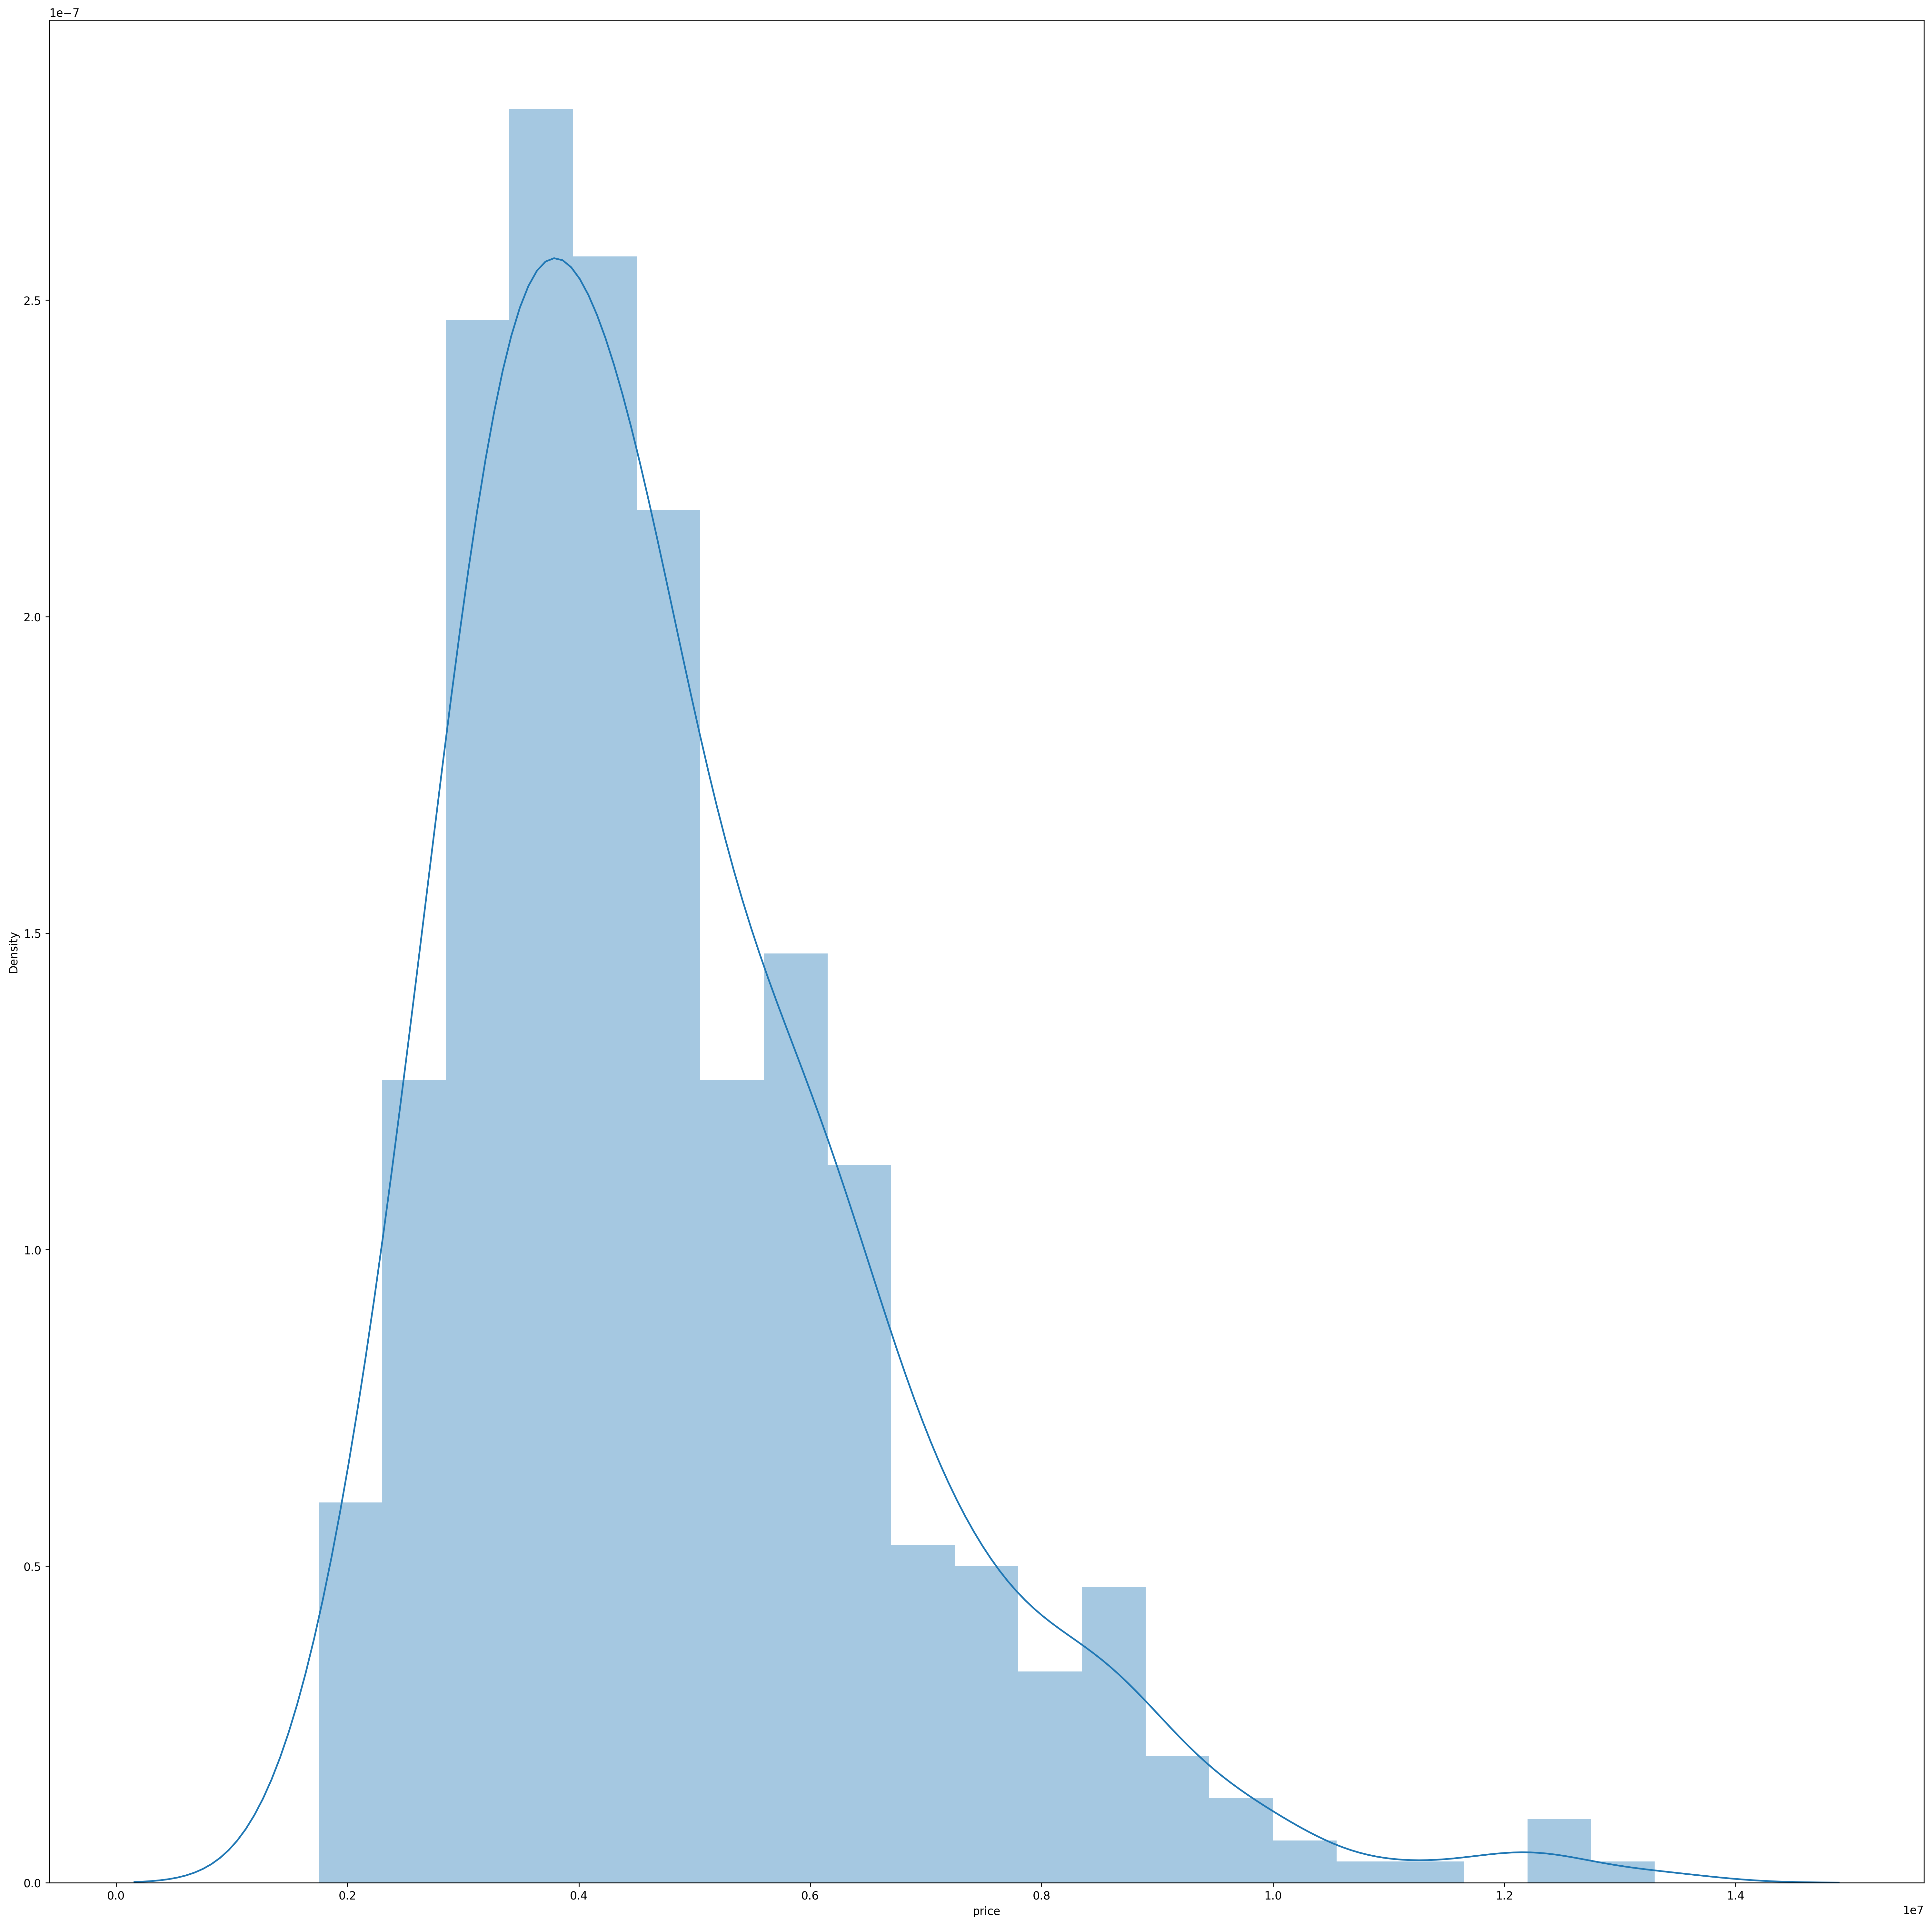

In [30]:
import seaborn as sns
sns.distplot(Housing['price'])

<Axes: xlabel='area', ylabel='Density'>

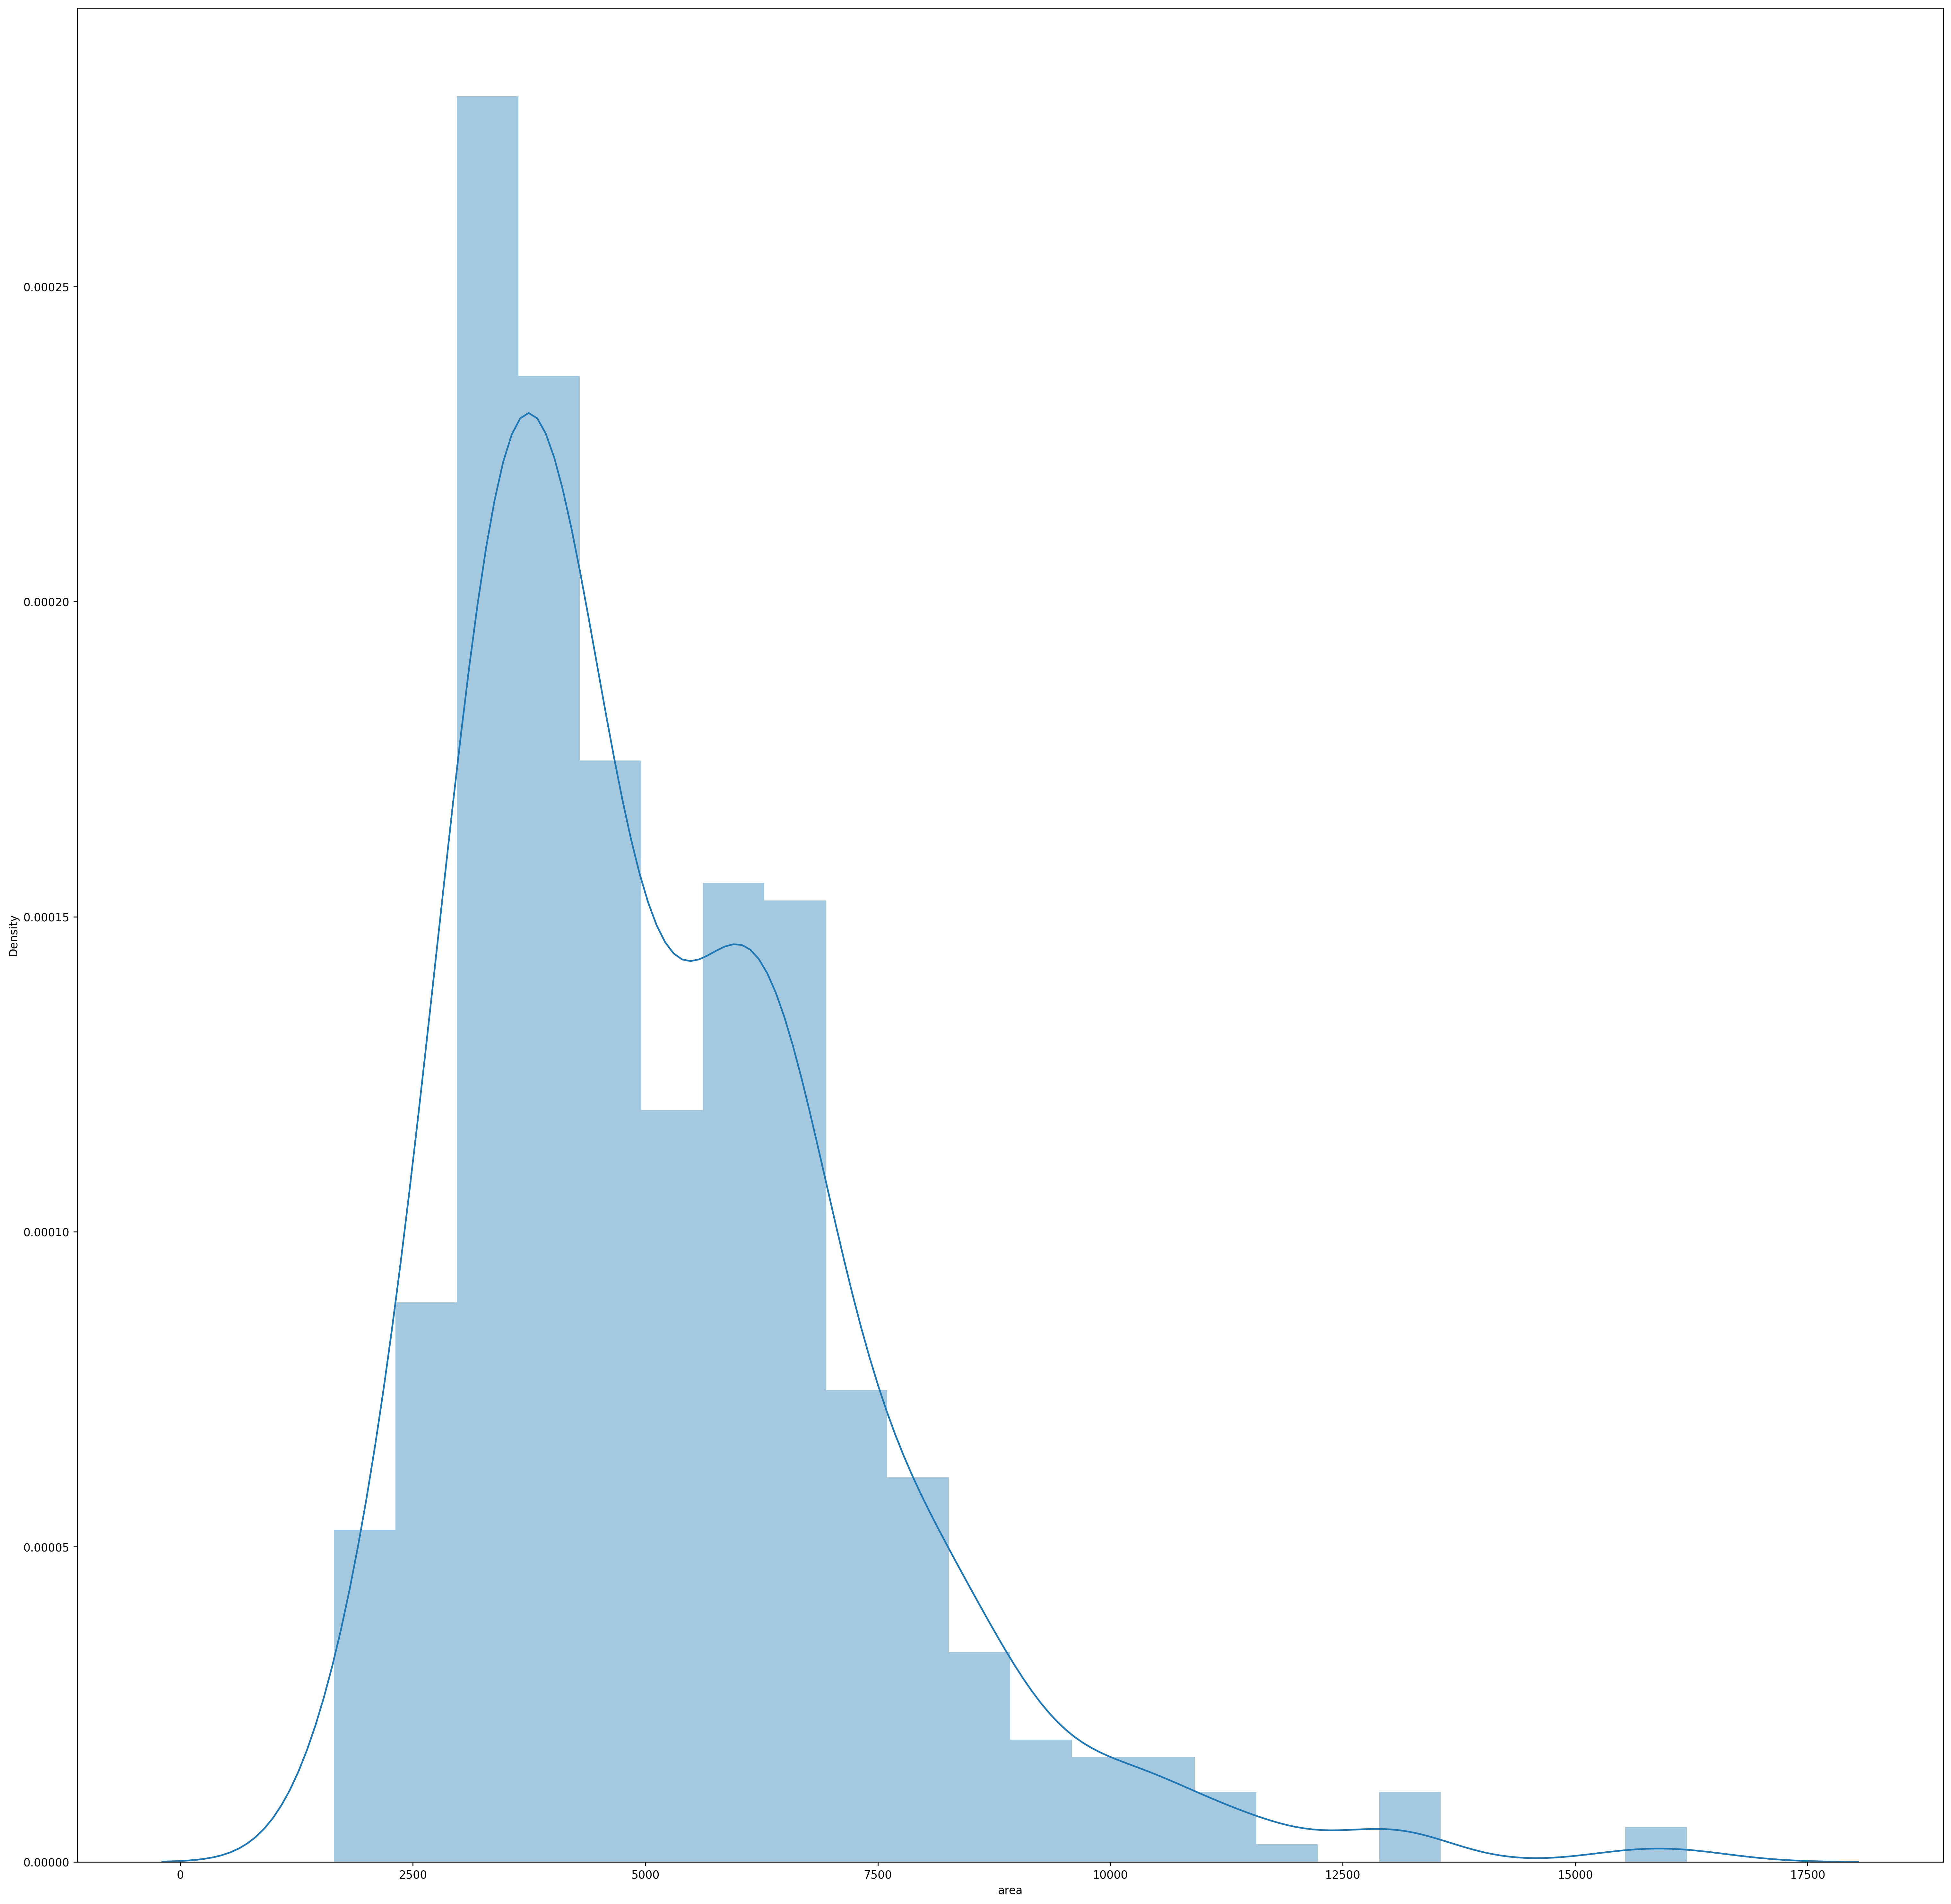

In [31]:
sns.distplot(Housing['area'])

In [32]:
import statsmodels.formula.api as smf
model = smf.ols("area~price",data = Housing).fit()

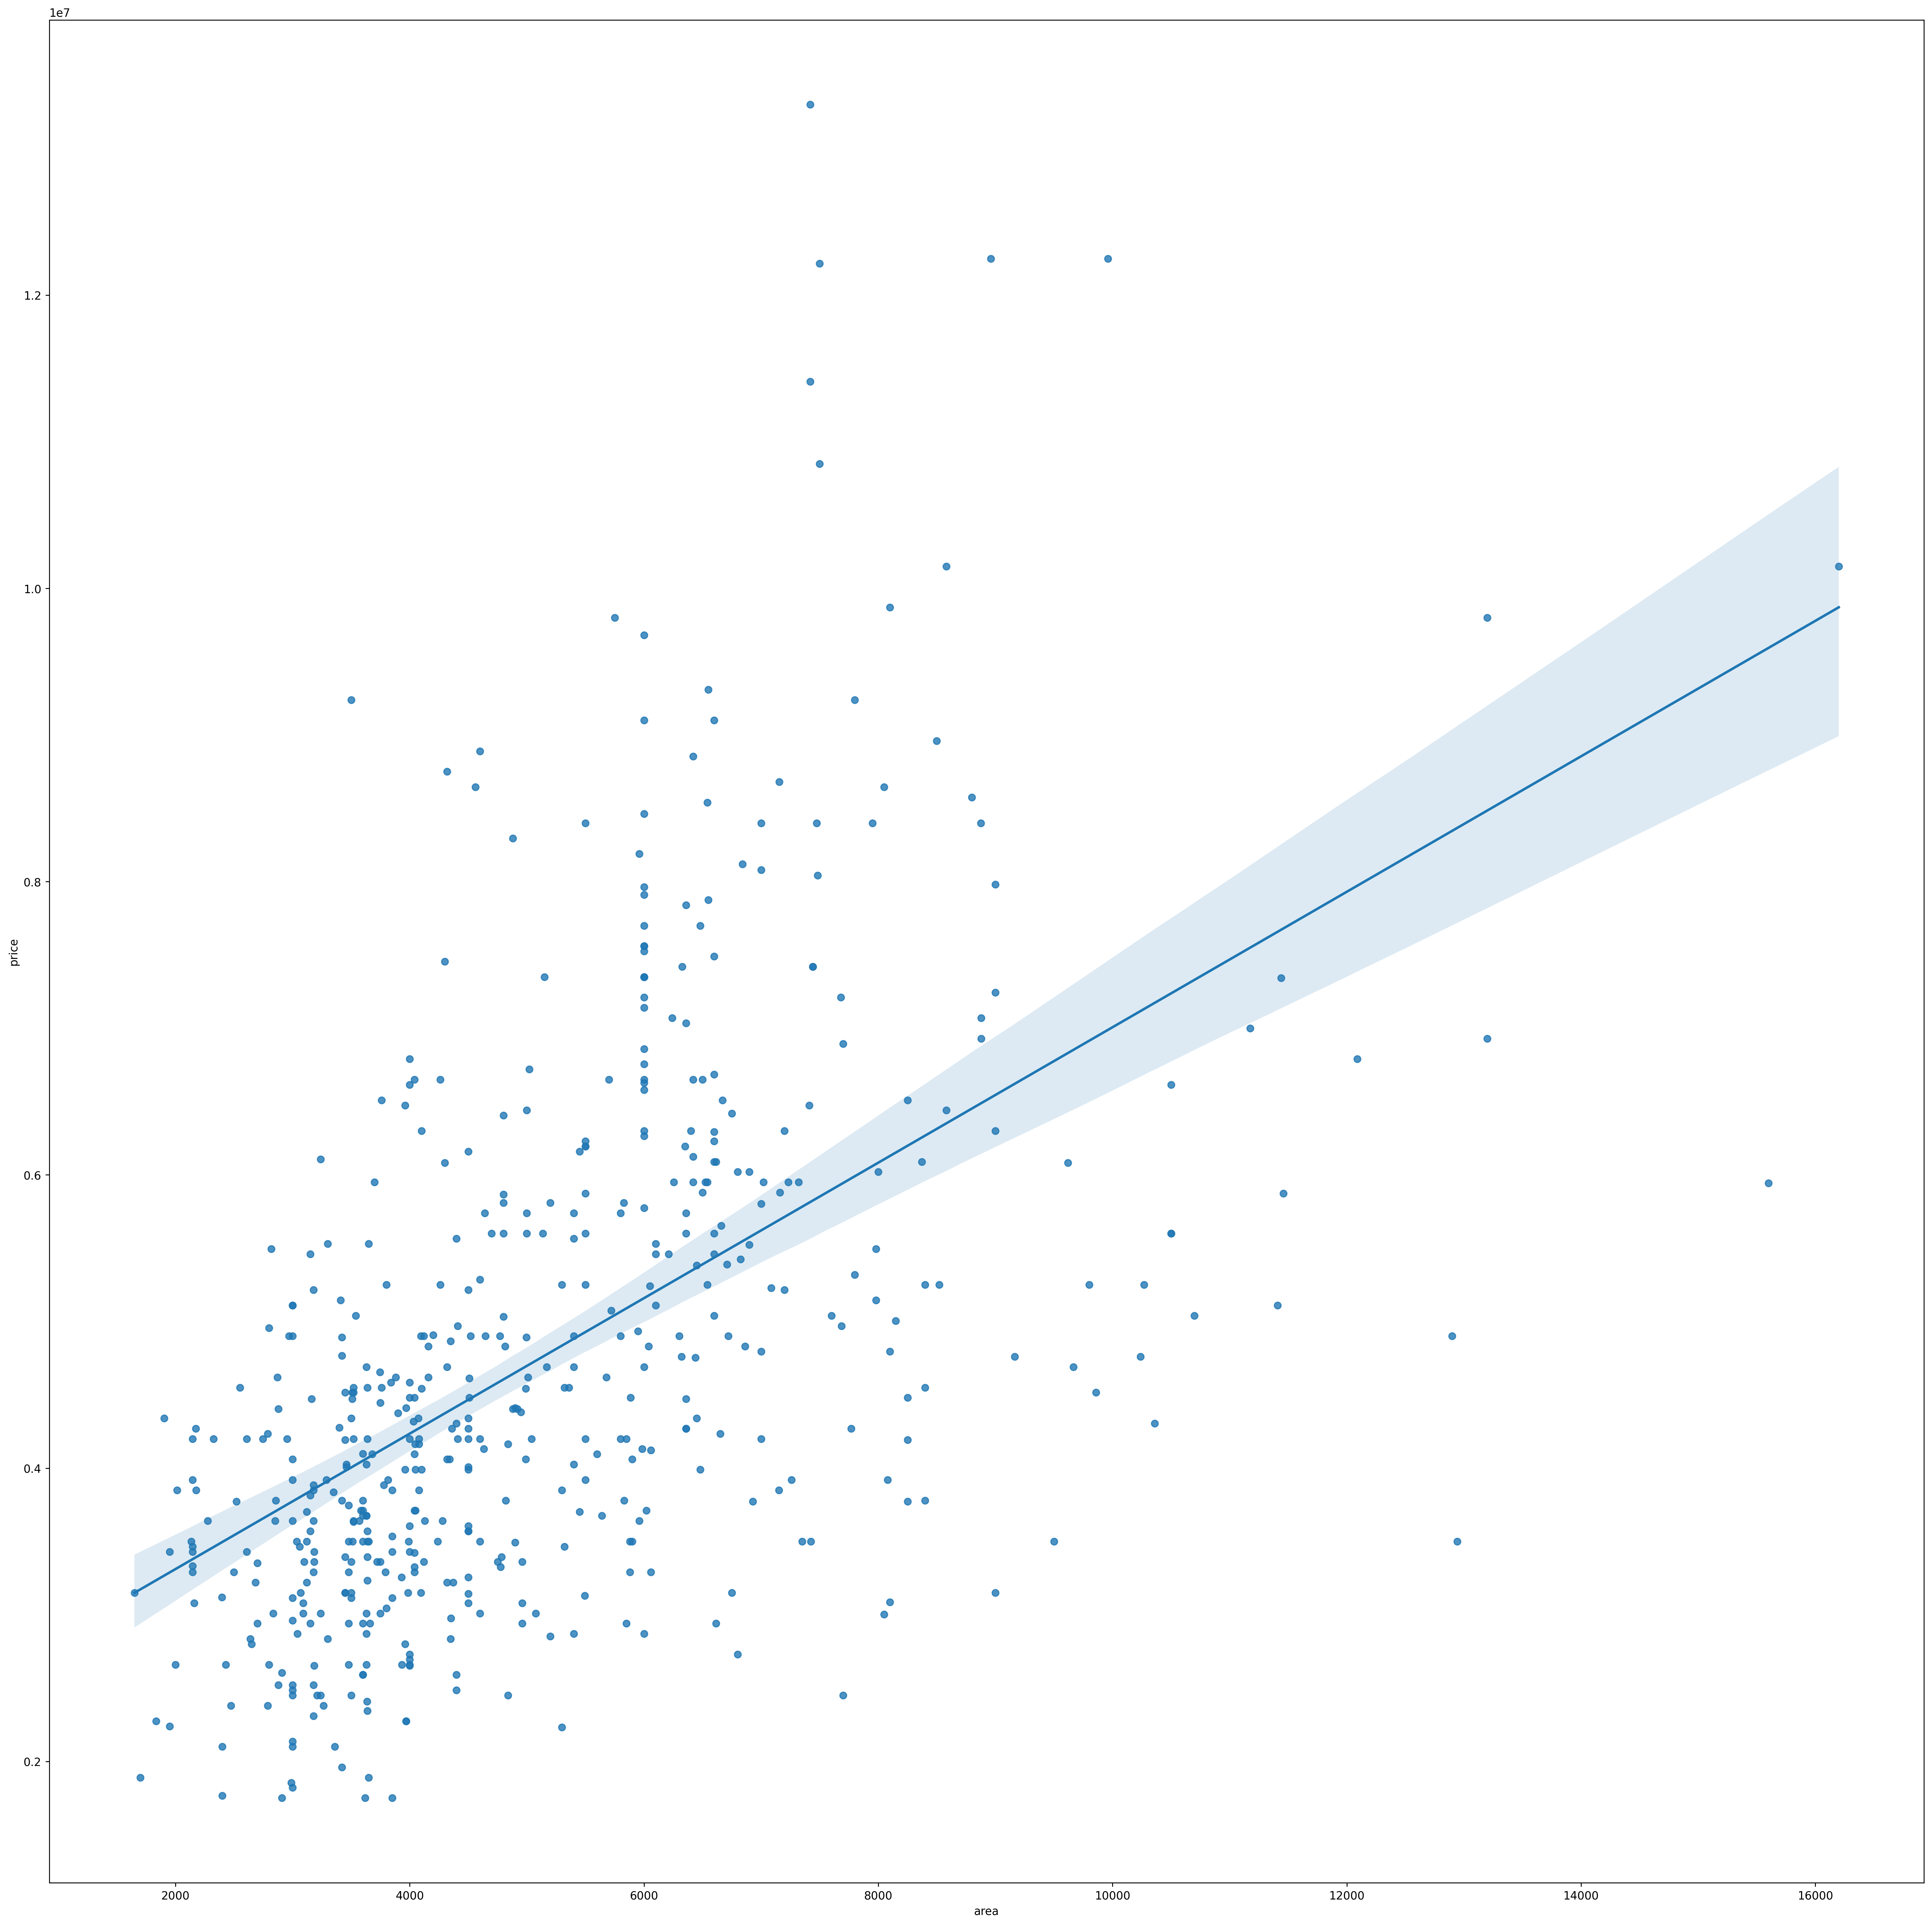

In [33]:
sns.regplot(x="area", y="price", data=Housing);

In [34]:
Housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split
X = Housing.drop(['price'], axis=1) 
y = Housing['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_pred) 
print("Mean Squared Error:", mse)

Mean Squared Error: 1535047758428.0498


In [40]:
fit = np.polyfit(Housing['price'], Housing['area'], deg=1) 
line = np.poly1d(fit)

In [41]:
import statsmodels.api as sm 
import plotly.express as px
scatter_plot = px.scatter(Housing, x='price', y='area', trendline='ols')
scatter_plot.show()

In [42]:
import plotly.graph_objects as go
best_fit_line = go.Scatter(x=Housing['price'], y=line(Housing['price']), mode='lines', name='Best Fit Line')
scatter_plot.add_trace(best_fit_line)

In [43]:
# Splitting the data into training and testing sets
X = Housing.drop(columns=['price'])
y = Housing['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Adding a constant to the model (intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Building the OLS model
model = sm.OLS(y_train, X_train).fit()

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print(model.summary())
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     69.15
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.51e-86
Time:                        22:04:44   Log-Likelihood:                -5797.6
No. Observations:                 381   AIC:                         1.162e+04
Df Residuals:                     368   BIC:                         1.167e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.242e+05   2.94e+05  

Coefficients:
                   Coefficient
const             1.241578e+05
area              2.530623e+02
bedrooms          8.273487e+04
bathrooms         1.117373e+06
stories           4.158011e+05
mainroad          4.083205e+05
guestroom         2.795340e+05
basement          4.849802e+05
hotwaterheating   6.199343e+05
airconditioning   6.800069e+05
parking           3.040783e+05
prefarea          5.094415e+05
furnishingstatus -1.980313e+05


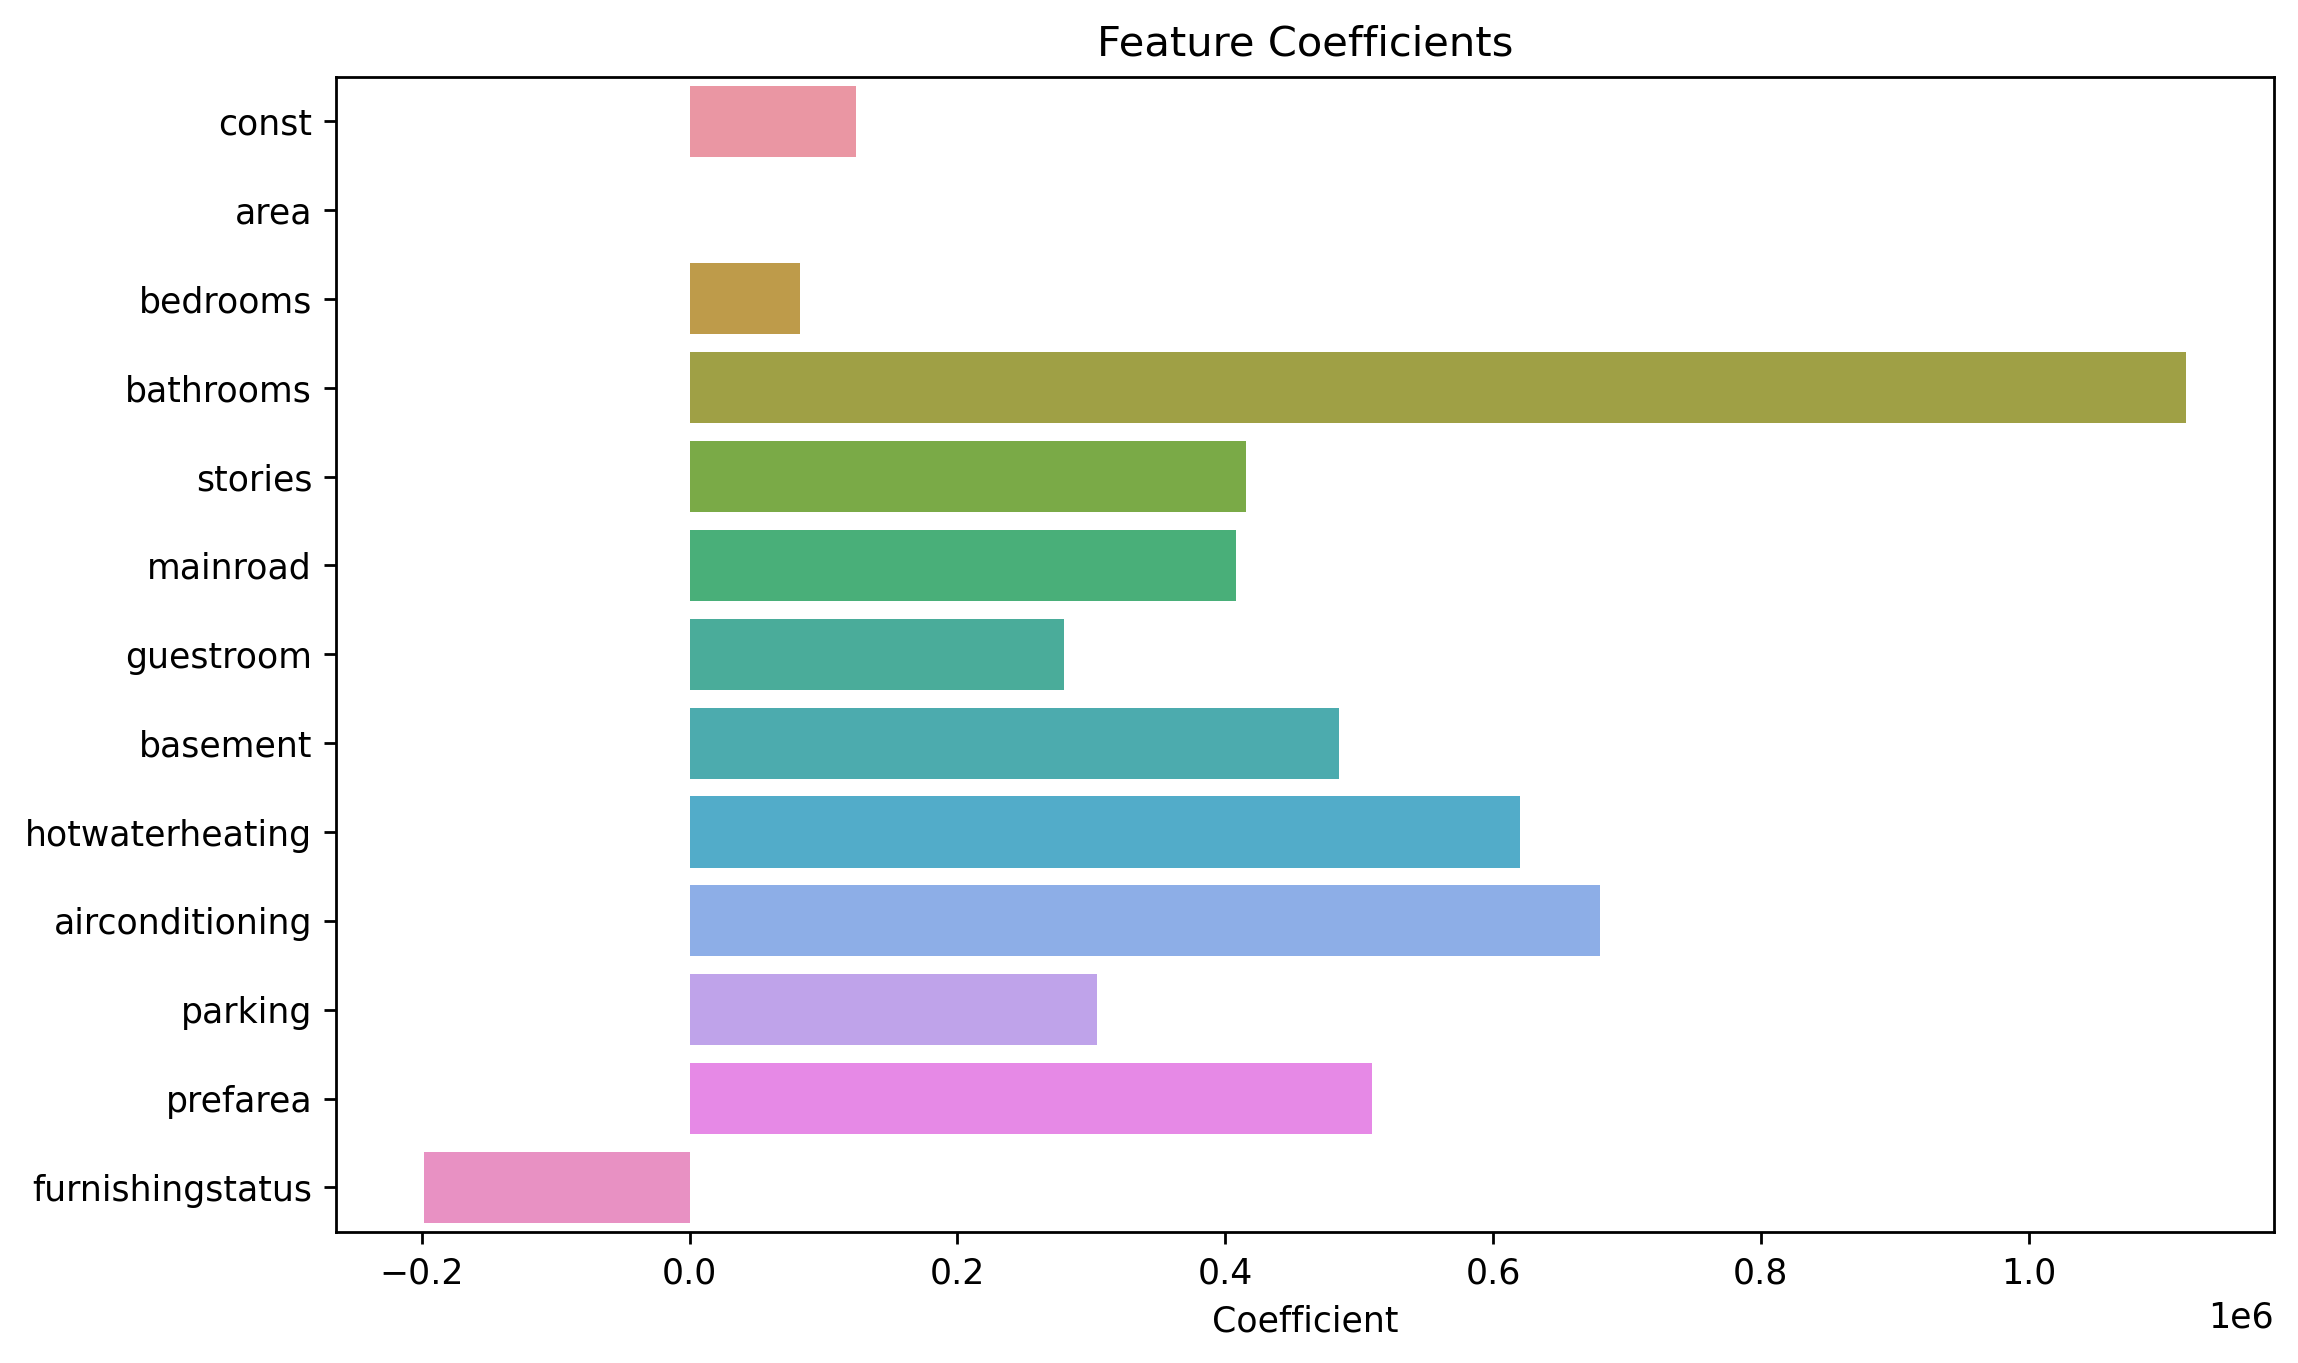


1. The model achieved a Mean Squared Error (MSE) of 1535047758428.05 on the test set.
2. The R-squared score indicates that 64.35% of the variance in house prices is explained by the model.
3. The most significant features for predicting house prices are area, bedrooms, bathrooms based on their coefficients.
4. Further tuning of the model and additional feature engineering could improve performance.




In [44]:
# Feature importance (OLS coefficients)
coefficients = pd.DataFrame(model.params, columns=['Coefficient'])

# Display coefficients
print("Coefficients:")
print(coefficients)

# Visualizing coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.Coefficient, y=coefficients.index)
plt.title('Feature Coefficients')
plt.show()

# Conclusions
conclusions = """
1. The model achieved a Mean Squared Error (MSE) of {:.2f} on the test set.
2. The R-squared score indicates that {:.2f}% of the variance in house prices is explained by the model.
3. The most significant features for predicting house prices are {} based on their coefficients.
4. Further tuning of the model and additional feature engineering could improve performance.

""".format(mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred) * 100, ', '.join(coefficients.index[1:4]))

print(conclusions)

In [45]:
# Load and preprocess data
df = pd.DataFrame(Housing)

# Encoding categorical variables
for column in df.select_dtypes(include=['object']).columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Log transformation of the price
df['log_price'] = np.log(df['price'])

# Feature matrix and target variable
X = df.drop(columns=['price', 'log_price'])
y = df['log_price']

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Model building
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Summary of model
X_train_sm = sm.add_constant(X_train)  # Add constant term for intercept
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

# Metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r_squared)

# Transforming back predictions
y_pred_original = np.exp(y_pred)
y_test_original = np.exp(y_test)

# Evaluation on original scale
mse_original = mean_squared_error(y_test_original, y_pred_original)
r_squared_original = r2_score(y_test_original, y_pred_original)
print("Mean Squared Error (Original Scale):", mse_original)
print("R-squared Score (Original Scale):", r_squared_original)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     14.03
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           5.78e-66
Time:                        22:04:46   Log-Likelihood:                 162.22
No. Observations:                 381   AIC:                            -156.4
Df Residuals:                     297   BIC:                             174.7
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.2988      0.262     54.641      0.0